In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import blackjack as bj
import numpy as np
from collections import defaultdict
import importlib

from blackjack import Simulation

importlib.reload(bj)

ModuleNotFoundError: No module named 'pandas'

Conduct a blackjack simulation
* mc_runs unique simulations run then merged to minimise effect of local minima noise in results

In [ ]:
mc_runs = 1000

trials = [0 for _ in range(mc_runs)]

for i in range(mc_runs):
    if i % 100 == 0:
        print(f"iteration {i}, {mc_runs - i} sims remain")
    trials[i] = bj.mp_sim(8, 1000, exp_rate=0.2, learn_rate=0.05)

result = bj.merge_q_values(trials)

iteration 0, 1000 sims remain
iteration 100, 900 sims remain
iteration 200, 800 sims remain
iteration 300, 700 sims remain
iteration 400, 600 sims remain
iteration 500, 500 sims remain
iteration 600, 400 sims remain
iteration 700, 300 sims remain
iteration 800, 200 sims remain
iteration 900, 100 sims remain


In [ ]:
sim = bj.Simulation(exp_rate = 0.2, learn_rate = 0.1,  action_ref = result, out='split')

mc_runs = 2000
trials = [0 for _ in range(mc_runs)]

for i in range(mc_runs):
    if i % 100 == 0:
        print(f"iteration {i}, {mc_runs - i} sims remain")
    trials[i] =  sim.trials(2000)

split_result = bj.merge_q_values(trials)

iteration 0, 2000 sims remain
iteration 100, 1900 sims remain
iteration 200, 1800 sims remain
iteration 300, 1700 sims remain
iteration 400, 1600 sims remain
iteration 500, 1500 sims remain
iteration 600, 1400 sims remain
iteration 700, 1300 sims remain
iteration 800, 1200 sims remain
iteration 900, 1100 sims remain
iteration 1000, 1000 sims remain
iteration 1100, 900 sims remain
iteration 1200, 800 sims remain
iteration 1300, 700 sims remain
iteration 1400, 600 sims remain
iteration 1500, 500 sims remain
iteration 1600, 400 sims remain
iteration 1700, 300 sims remain
iteration 1800, 200 sims remain
iteration 1900, 100 sims remain


In [ ]:
res = defaultdict(lambda: (-2.0, None))
res_ace = defaultdict(lambda: (-2.0, None))

for (state, action), value in result.items():
    suc = value['success']
    substate = state[:-1]

    if state[2] == 0:
        if suc > res[substate][0]:
            res[substate] = (suc, action)
    else:
        if suc > res_ace[substate][0]:
            res_ace[substate] = (suc, action)


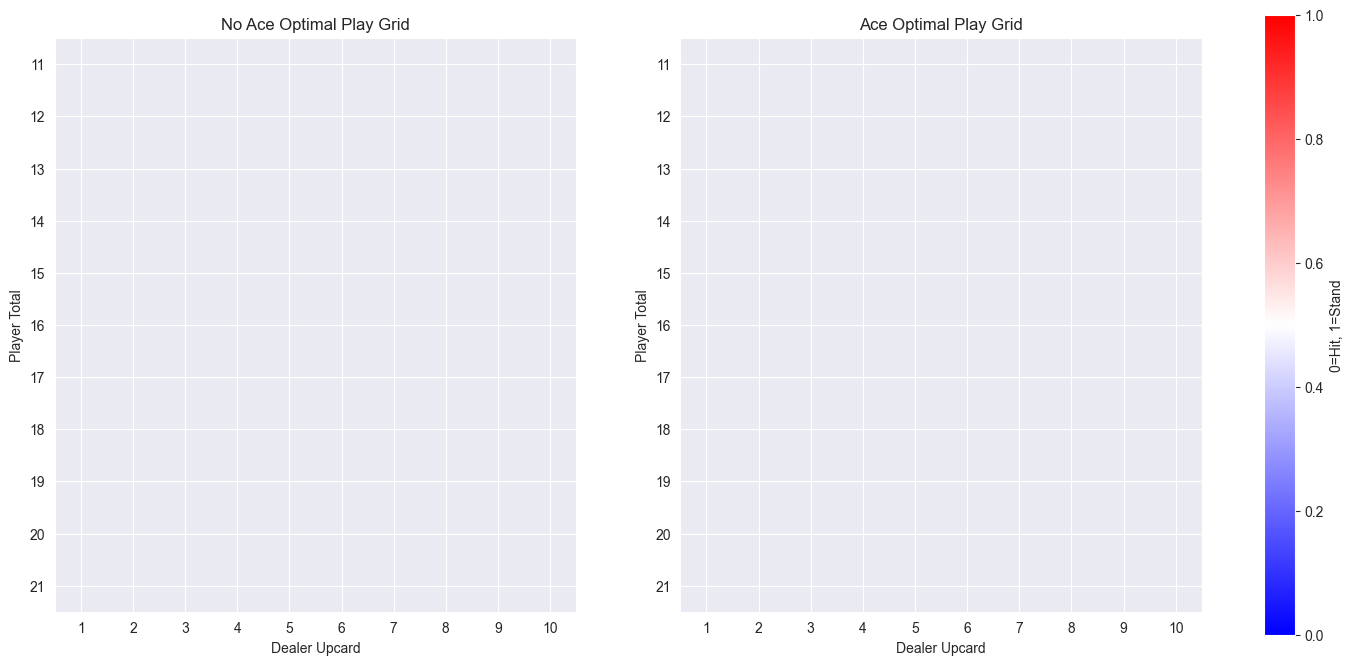

In [ ]:
def hit_stand(ref, title, ax):
    dealer_vals = range(1, 11)
    player_vals = range(11, 22)

    grid = np.full((len(player_vals), len(dealer_vals)), np.nan)
    for [player, dealer], [val, action] in ref.items():
        if player >= 11:
            if player in player_vals and dealer in dealer_vals:
                grid[player - 11, dealer - 1] = 1 if action else 0

    im = ax.imshow(grid, cmap="bwr", origin="upper", vmin=0, vmax=1)
    ax.set_xticks(range(len(dealer_vals)), dealer_vals)
    ax.set_yticks(range(len(player_vals)), player_vals)
    ax.set_title(title)
    ax.set_xlabel("Dealer Upcard")
    ax.set_ylabel("Player Total")
    return im

fig, axs = plt.subplots(1, 2, figsize=(16, 12))
axs = axs.flatten()

im0 = hit_stand(res, "No Ace Optimal Play Grid", axs[0])
im1 = hit_stand(res_ace, "Ace Optimal Play Grid", axs[1])

plt.colorbar(im0, ax=axs, label="0=Hit, 1=Stand", fraction=0.025)
plt.show()


Analysis of the best hand, by win rate %

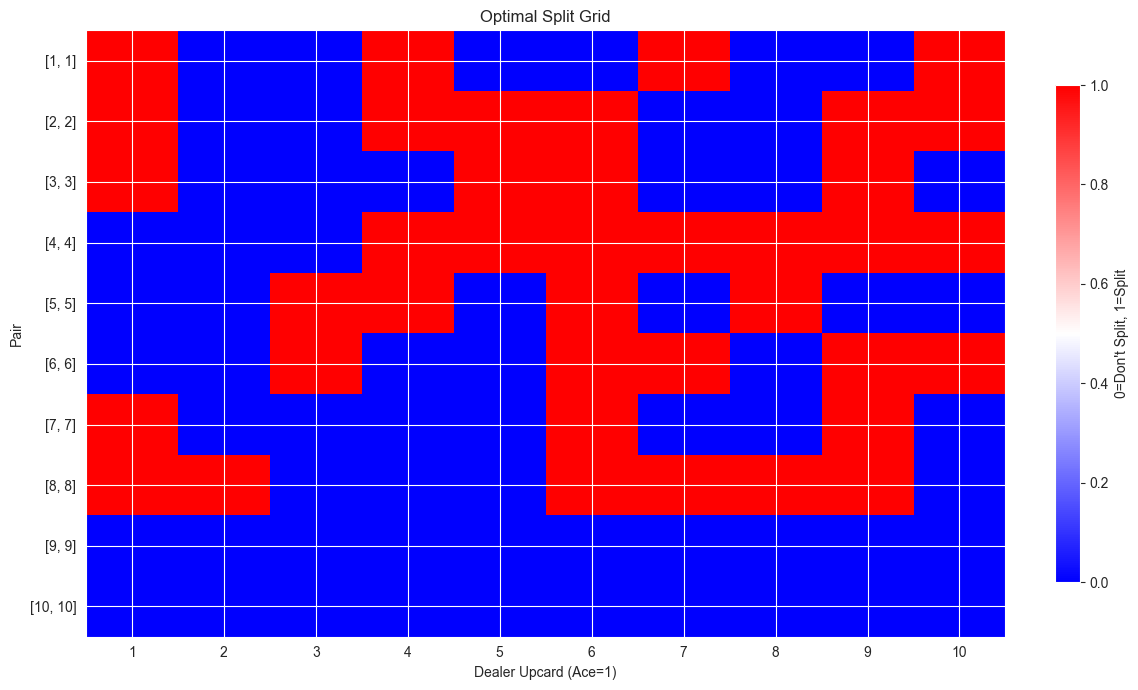

In [ ]:
def best_split_by_state(split_result, min_count=0):

    best = defaultdict(lambda: (-2.0, None))

    for (state, action), value in split_result.items():
        (pair, dealer) = state
        suc = value['success']

        key = (pair, dealer)
        if suc > best[key][0]:
            best[key] = (suc, action)

    return best

def plot_split_grid(best_map, title="Optimal Split Grid, Red = Split"):

    dealer_vals = list(range(1, 11))
    pair_vals   = list(range(1, 11))

    grid = np.full((len(pair_vals), len(dealer_vals)), np.nan)
    for (pair, dealer), (succ, action) in best_map.items():
        p_left, p_right = pair
        p = p_left

        row = p - 1
        col = dealer - 1
        grid[row, col] = 1.0 if action else 0.0

    ytick_labels = [f"[{x}, {x}]" for x in pair_vals]
    xtick_labels = dealer_vals

    plt.figure(figsize=(11, 7))
    im = plt.imshow(grid, cmap="bwr", origin="upper", vmin=0, vmax=1, aspect="auto")
    plt.xticks(ticks=range(len(dealer_vals)), labels=xtick_labels)
    plt.yticks(ticks=range(len(pair_vals)),   labels=ytick_labels)
    plt.xlabel("Dealer Upcard (Ace=1)")
    plt.ylabel("Pair")
    plt.title(title)
    plt.tight_layout()



best_map = best_split_by_state(split_result, min_count=0)
plot_split_grid(best_map)

plt.colorbar(label="0=Don't Split, 1=Split", fraction=0.025)
plt.show()